In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
import plotly.io as pio
pio.renderers.default='notebook'

In [4]:
!pip install pymorphy2

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data1 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_0_1800.pkl')

In [7]:
data2 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_1800_3600.pkl')

In [8]:
data3 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_3600_5400.pkl')

In [9]:
data4 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_5400_7200.pkl')

In [10]:
data5 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_7200_9000.pkl')

In [11]:
data6 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_9000_10800.pkl')

In [12]:
data7 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_10800_12600.pkl')

In [13]:
data8 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_12600_14400.pkl')

In [14]:
data9 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_14400_16200.pkl')

In [15]:
data10 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_16200_18000.pkl')

In [16]:
data11 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_18000_19800.pkl')

In [17]:
data12 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_19800_21600.pkl')

In [18]:
data13 = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/data_21600_23400.pkl')

In [19]:
data1 = pd.concat([data1, data2], ignore_index=True)

In [20]:
data1 = pd.concat([data1, data3, data4, data5], ignore_index=True)

In [21]:
data1 = pd.concat([data1, data6, data7, data8, data9, data10, data11, data12, data13], ignore_index=True)

In [22]:
data1

,id,region,year,instance,court_name,caseNumber,entryDate,names,judge,resultDate,...,endDate,consideredBy,cui,accused,hash,articles,link_meta,link_text,is_text,text
0,28,1,2016,FIRST,Гиагинский районный суд Республики Адыгеи,1-35/2016,11.03.2016,Чаплыгин Андрей Станиславич - ст.105 ч.1 УК РФ,Неверов Е. Ю.,2016-03-31,...,12.04.2016,Рассмотрено единолично судьей,01RS0001-01-2016-001129-29,Чаплыгин Андрей Станиславич,c9bc799e489abb0b4d13daadaed9bd08,ст.105 ч.1,http://giaginsky--adg.sudrf.ru/modules.php?nam...,http://giaginsky--adg.sudrf.ru/modules.php?nam...,True,Именем Российской Федерации\n<адрес> ДД.ММ.ГГГ...
1,30,1,2016,FIRST,Гиагинский районный суд Республики Адыгеи,1-115/2016,27.10.2016,Курыгина Наталья Михайловна - ст.105 ч.1 УК РФ,Неверов Е. Ю.,2016-12-23,...,31.03.2017,Рассмотрено единолично судьей,01RS0001-01-2016-001208-83,Курыгина Наталья Михайловна,e84e2f6876371e939f163c0f018a21f3,ст.105 ч.1,http://giaginsky--adg.sudrf.ru/modules.php?nam...,http://giaginsky--adg.sudrf.ru/modules.php?nam...,True,Именем Российской Федерации\n<адрес> ДД.ММ.ГГГ...
2,31,1,2016,FIRST,Гиагинский районный суд Республики Адыгеи,1-41/2016,31.03.2016,Крючкова Ольга Владимировна - ст.105 ч.1 УК РФ,Скоморохов С. В.,2016-05-18,...,31.05.2016,Рассмотрено единолично судьей,01RS0001-01-2016-001135-11,Крючкова Ольга Владимировна,782d87c6c22f21a3db5b6f25d03da1b7,ст.105 ч.1,http://giaginsky--adg.sudrf.ru/modules.php?nam...,http://giaginsky--adg.sudrf.ru/modules.php?nam...,True,Приговор\nИменем Российской Федерации\nст. Гиа...
3,36,1,2016,FIRST,Майкопский районный суд Республики Адыгея,1-101/2016,13.07.2016,Борисов Юрий Дмитриевич - ст.105 ч.1 УК РФ,Дарзиян Альберт Артюшевич,2016-08-05,...,16.08.2016,Рассмотрено единолично судьей,01RS0005-01-2016-001929-36,Борисов Юрий Дмитриевич,034e9c9cde6bb14bf2cd75df8407b40e,ст.105 ч.1,http://maikopskyr--adg.sudrf.ru/modules.php?na...,http://maikopskyr--adg.sudrf.ru/modules.php?na...,True,К делу № 1-101/16\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ...
4,38,1,2016,FIRST,Майкопский районный суд Республики Адыгея,1-118/2016,16.08.2016,Пушкарева Елена Александровна - ст.105 ч.1 УК РФ,Бражников Евгений Геннадьевич,2016-09-06,...,19.09.2016,Рассмотрено единолично судьей,01RS0005-01-2016-001946-82,Пушкарева Елена Александровна,0b766f191fb8d8b77d9f2434312cf9b8,ст.105 ч.1,http://maikopskyr--adg.sudrf.ru/modules.php?na...,http://maikopskyr--adg.sudrf.ru/modules.php?na...,True,К делу № 1-118/16\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,90640,5,2020,FIRST,Верховный Суд Республики Дагестан,2-12/2020,06.04.2020,"Алибеков Магомед Ахмедович - ст.222 ч.3, ст.20...",Сулейманов Сулейман Магомедович,2020-06-23,...,04.07.2020,Рассмотрено единолично судьей,05OS0000-01-2020-000153-89,Алибеков Магомед Ахмедович,116d3f9e3a253fe9224e5cdd9d4d1bc6,"ст.222 ч.3, ст.209 ч.1, ст.162 ч.4 п.а, ст.162...",http://vs--dag.sudrf.ru/modules.php?name=sud_d...,http://vs--dag.sudrf.ru/modules.php?name=sud_d...,True,П Р И Г О В О Р\nИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ\n...
23396,90685,5,2020,FIRST,Верховный Суд Республики Дагестан,2-15/2020,30.04.2020,"Аскеров Адиль Арсланович - ст.222 ч.3, ст.162 ...",Исрафилов Закир Эфендиевич,2020-12-28,...,23.03.2021,Рассмотрено единолично судьей,05OS0000-01-2020-000166-50,Аскеров Адиль Арсланович,7dfa2b80931d720416f53ef52d324c38,"ст.222 ч.3, ст.162 ч.4 п.а, ст.162 ч.4 п.а, ст...",http://vs--dag.sudrf.ru/modules.php?name=sud_d...,http://vs--dag.sudrf.ru/modules.php?name=sud_d...,True,Дело №2-15/2020\nП Р И Г О В О Р\nИМЕНЕМ РОССИ...
23397,90686,5,2020,FIRST,Верховный Суд Республики Дагестан,2-21/2020,30.07.2020,"Хадисов Муса Джамалудинович - ст.139 ч.1, ст.1...",Сулейманов Сулейман Магомедович,2020-09-14,...,29.09.2020,Рассмотрено единолично судьей,05OS0000-01-2020-000183-96,Хадисов Муса Джамалудинович,a2a693c59caaa20a6be5d9ddd686a94b,"ст.139 ч.1, ст.105 ч.2 п.а",http://vs--dag.sudrf.ru/modules.php?name=sud_d...,http://vs--dag.sudrf.ru/modules.php?name=sud_d...,

In [23]:
len(data1['region'].unique())

85

In [24]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

name_list = data1['accused']
sexes = []

for name in name_list:
    try:
      parsed_word = morph.parse(name)[0]
      strr = '{:<15} {}'.format(name, parsed_word.tag.gender)
      strr = strr[-4:]
      sexes.append(strr)
    except:
      sexes.append('None')

In [25]:
len(sexes)

23400

In [26]:
testik = pd.DataFrame([['masc']], columns=['sex'])

In [27]:
for i in  range(1, 23400):
  testik.loc[len(testik)] = [sexes[i]]

In [28]:
testik['id'] = data1['id']
ids = data1['id'].tolist()
i = 0
for j in ids:
  testik['id'][i]  = int(j)
  i = i + 1

In [29]:
data1.merge(testik, left_on='id', right_on='id', suffixes=('_left', '_right'))

,id,region,year,instance,court_name,caseNumber,entryDate,names,judge,resultDate,...,consideredBy,cui,accused,hash,articles,link_meta,link_text,is_text,text,sex
0,28,1,2016,FIRST,Гиагинский районный суд Республики Адыгеи,1-35/2016,11.03.2016,Чаплыгин Андрей Станиславич - ст.105 ч.1 УК РФ,Неверов Е. Ю.,2016-03-31,...,Рассмотрено единолично судьей,01RS0001-01-2016-001129-29,Чаплыгин Андрей Станиславич,c9bc799e489abb0b4d13daadaed9bd08,ст.105 ч.1,http://giaginsky--adg.sudrf.ru/modules.php?nam...,http://giaginsky--adg.sudrf.ru/modules.php?nam...,True,Именем Российской Федерации\n<адрес> ДД.ММ.ГГГ...,masc
1,30,1,2016,FIRST,Гиагинский районный суд Республики Адыгеи,1-115/2016,27.10.2016,Курыгина Наталья Михайловна - ст.105 ч.1 УК РФ,Неверов Е. Ю.,2016-12-23,...,Рассмотрено единолично судьей,01RS0001-01-2016-001208-83,Курыгина Наталья Михайловна,e84e2f6876371e939f163c0f018a21f3,ст.105 ч.1,http://giaginsky--adg.sudrf.ru/modules.php?nam...,http://giaginsky--adg.sudrf.ru/modules.php?nam...,True,Именем Российской Федерации\n<адрес> ДД.ММ.ГГГ...,femn
2,31,1,2016,FIRST,Гиагинский районный суд Республики Адыгеи,1-41/2016,31.03.2016,Крючкова Ольга Владимировна - ст.105 ч.1 УК РФ,Скоморохов С. В.,2016-05-18,...,Рассмотрено единолично судьей,01RS0001-01-2016-001135-11,Крючкова Ольга Владимировна,782d87c6c22f21a3db5b6f25d03da1b7,ст.105 ч.1,http://giaginsky--adg.sudrf.ru/modules.php?nam...,http://giaginsky--adg.sudrf.ru/modules.php?nam...,True,Приговор\nИменем Российской Федерации\nст. Гиа...,femn
3,36,1,2016,FIRST,Майкопский районный суд Республики Адыгея,1-101/2016,13.07.2016,Борисов Юрий Дмитриевич - ст.105 ч.1 УК РФ,Дарзиян Альберт Артюшевич,2016-08-05,...,Рассмотрено единолично судьей,01RS0005-01-2016-001929-36,Борисов Юрий Дмитриевич,034e9c9cde6bb14bf2cd75df8407b40e,ст.105 ч.1,http://maikopskyr--adg.sudrf.ru/modules.php?na...,http://maikopskyr--adg.sudrf.ru/modules.php?na...,True,К делу № 1-101/16\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ...,masc
4,38,1,2016,FIRST,Майкопский районный суд Республики Адыгея,1-118/2016,16.08.2016,Пушкарева Елена Александровна - ст.105 ч.1 УК РФ,Бражников Евгений Геннадьевич,2016-09-06,...,Рассмотрено единолично судьей,01RS0005-01-2016-001946-82,Пушкарева Елена Александровна,0b766f191fb8d8b77d9f2434312cf9b8,ст.105 ч.1,http://maikopskyr--adg.sudrf.ru/modules.php?na...,http://maikopskyr--adg.sudrf.ru/modules.php?na...,True,К делу № 1-118/16\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ...,femn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,90640,5,2020,FIRST,Верховный Суд Республики Дагестан,2-12/2020,06.04.2020,"Алибеков Магомед Ахмедович - ст.222 ч.3, ст.20...",Сулейманов Сулейман Магомедович,2020-06-23,...,Рассмотрено единолично судьей,05OS0000-01-2020-000153-89,Алибеков Магомед Ахмедович,116d3f9e3a253fe9224e5cdd9d4d1bc6,"ст.222 ч.3, ст.209 ч.1, ст.162 ч.4 п.а, ст.162...",http://vs--dag.sudrf.ru/modules.php?name=sud_d...,http://vs--dag.sudrf.ru/modules.php?name=sud_d...,True,П Р И Г О В О Р\nИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ\n...,masc
23396,90685,5,2020,FIRST,Верховный Суд Республики Дагестан,2-15/2020,30.04.2020,"Аскеров Адиль Арсланович - ст.222 ч.3, ст.162 ...",Исрафилов Закир Эфендиевич,2020-12-28,...,Рассмотрено единолично судьей,05OS0000-01-2020-000166-50,Аскеров Адиль Арсланович,7dfa2b80931d720416f53ef52d324c38,"ст.222 ч.3, ст.162 ч.4 п.а, ст.162 ч.4 п.а, ст...",http://vs--dag.sudrf.ru/modules.php?name=sud_d...,http://vs--dag.sudrf.ru/modules.php?name=sud_d...,True,Дело №2-15/2020\nП Р И Г О В О Р\nИМЕНЕМ РОССИ...,masc
23397,90686,5,2020,FIRST,Верховный Суд Республики Дагестан,2-21/2020,30.07.2020,"Хадисов Муса Джамалудинович - ст.139 ч.1, ст.1...",Сулейманов Сулейман Магомедович,2020-09-14,...,Рассмотрено единолично судьей,05OS0000-01-2020-000183-96,Хадисов Муса Джамалудинович,a2a693c59caaa20a6be5d9ddd686a94b,"ст.139 ч.1, ст.105 ч.2 п.а",http://vs--dag.sudrf.ru/modules.php?name=sud_d...,http://vs--dag.sudrf.ru/modules.php?name=sud_d...,True,П Р И Г О В О Р\nИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ\n...,ma

In [30]:
data1 = data1.loc[(data1['year'] == 2016) | (data1['year'] == 2017) | (data1['year'] == 2018) | (data1['year'] == 2019)]

In [31]:
region_dist = data1.groupby('region').count()

In [32]:
region_dist['region'] = 1

In [33]:
reg_list = data1['region'].unique()
reg_list = sorted(reg_list)
for i in reg_list:
  region_dist['region'][i] = i

In [34]:
region_dist

,id,year,instance,court_name,caseNumber,entryDate,names,judge,resultDate,decision,...,consideredBy,cui,accused,hash,articles,link_meta,link_text,is_text,text,region
region,,,,,,,,,,,,,,,,,,,,,
1,28,28,28,28,28,28,28,28,28,28,...,19,28,28,28,28,28,27,28,28,1
2,879,879,879,879,879,879,879,879,879,879,...,834,819,878,878,879,879,854,879,879,2
3,729,729,729,729,729,729,729,729,729,729,...,681,661,729,729,729,729,722,729,729,3
4,73,73,73,73,73,73,73,73,73,73,...,66,63,73,73,73,73,73,73,73,4
5,205,205,205,205,205,205,205,205,205,205,...,189,184,201,201,205,205,185,205,205,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,138,138,138,138,138,138,138,138,138,138,...,133,131,138,138,138,138,136,138,138,86
87,20,20,20,20,20,20,20,20,20,20,...,18,18,20,20,20,20,20,20,20,87
89,129,129,129,129,129,129,129,129,129,129,...,124,121,129,129,129,129,127,129,129,89


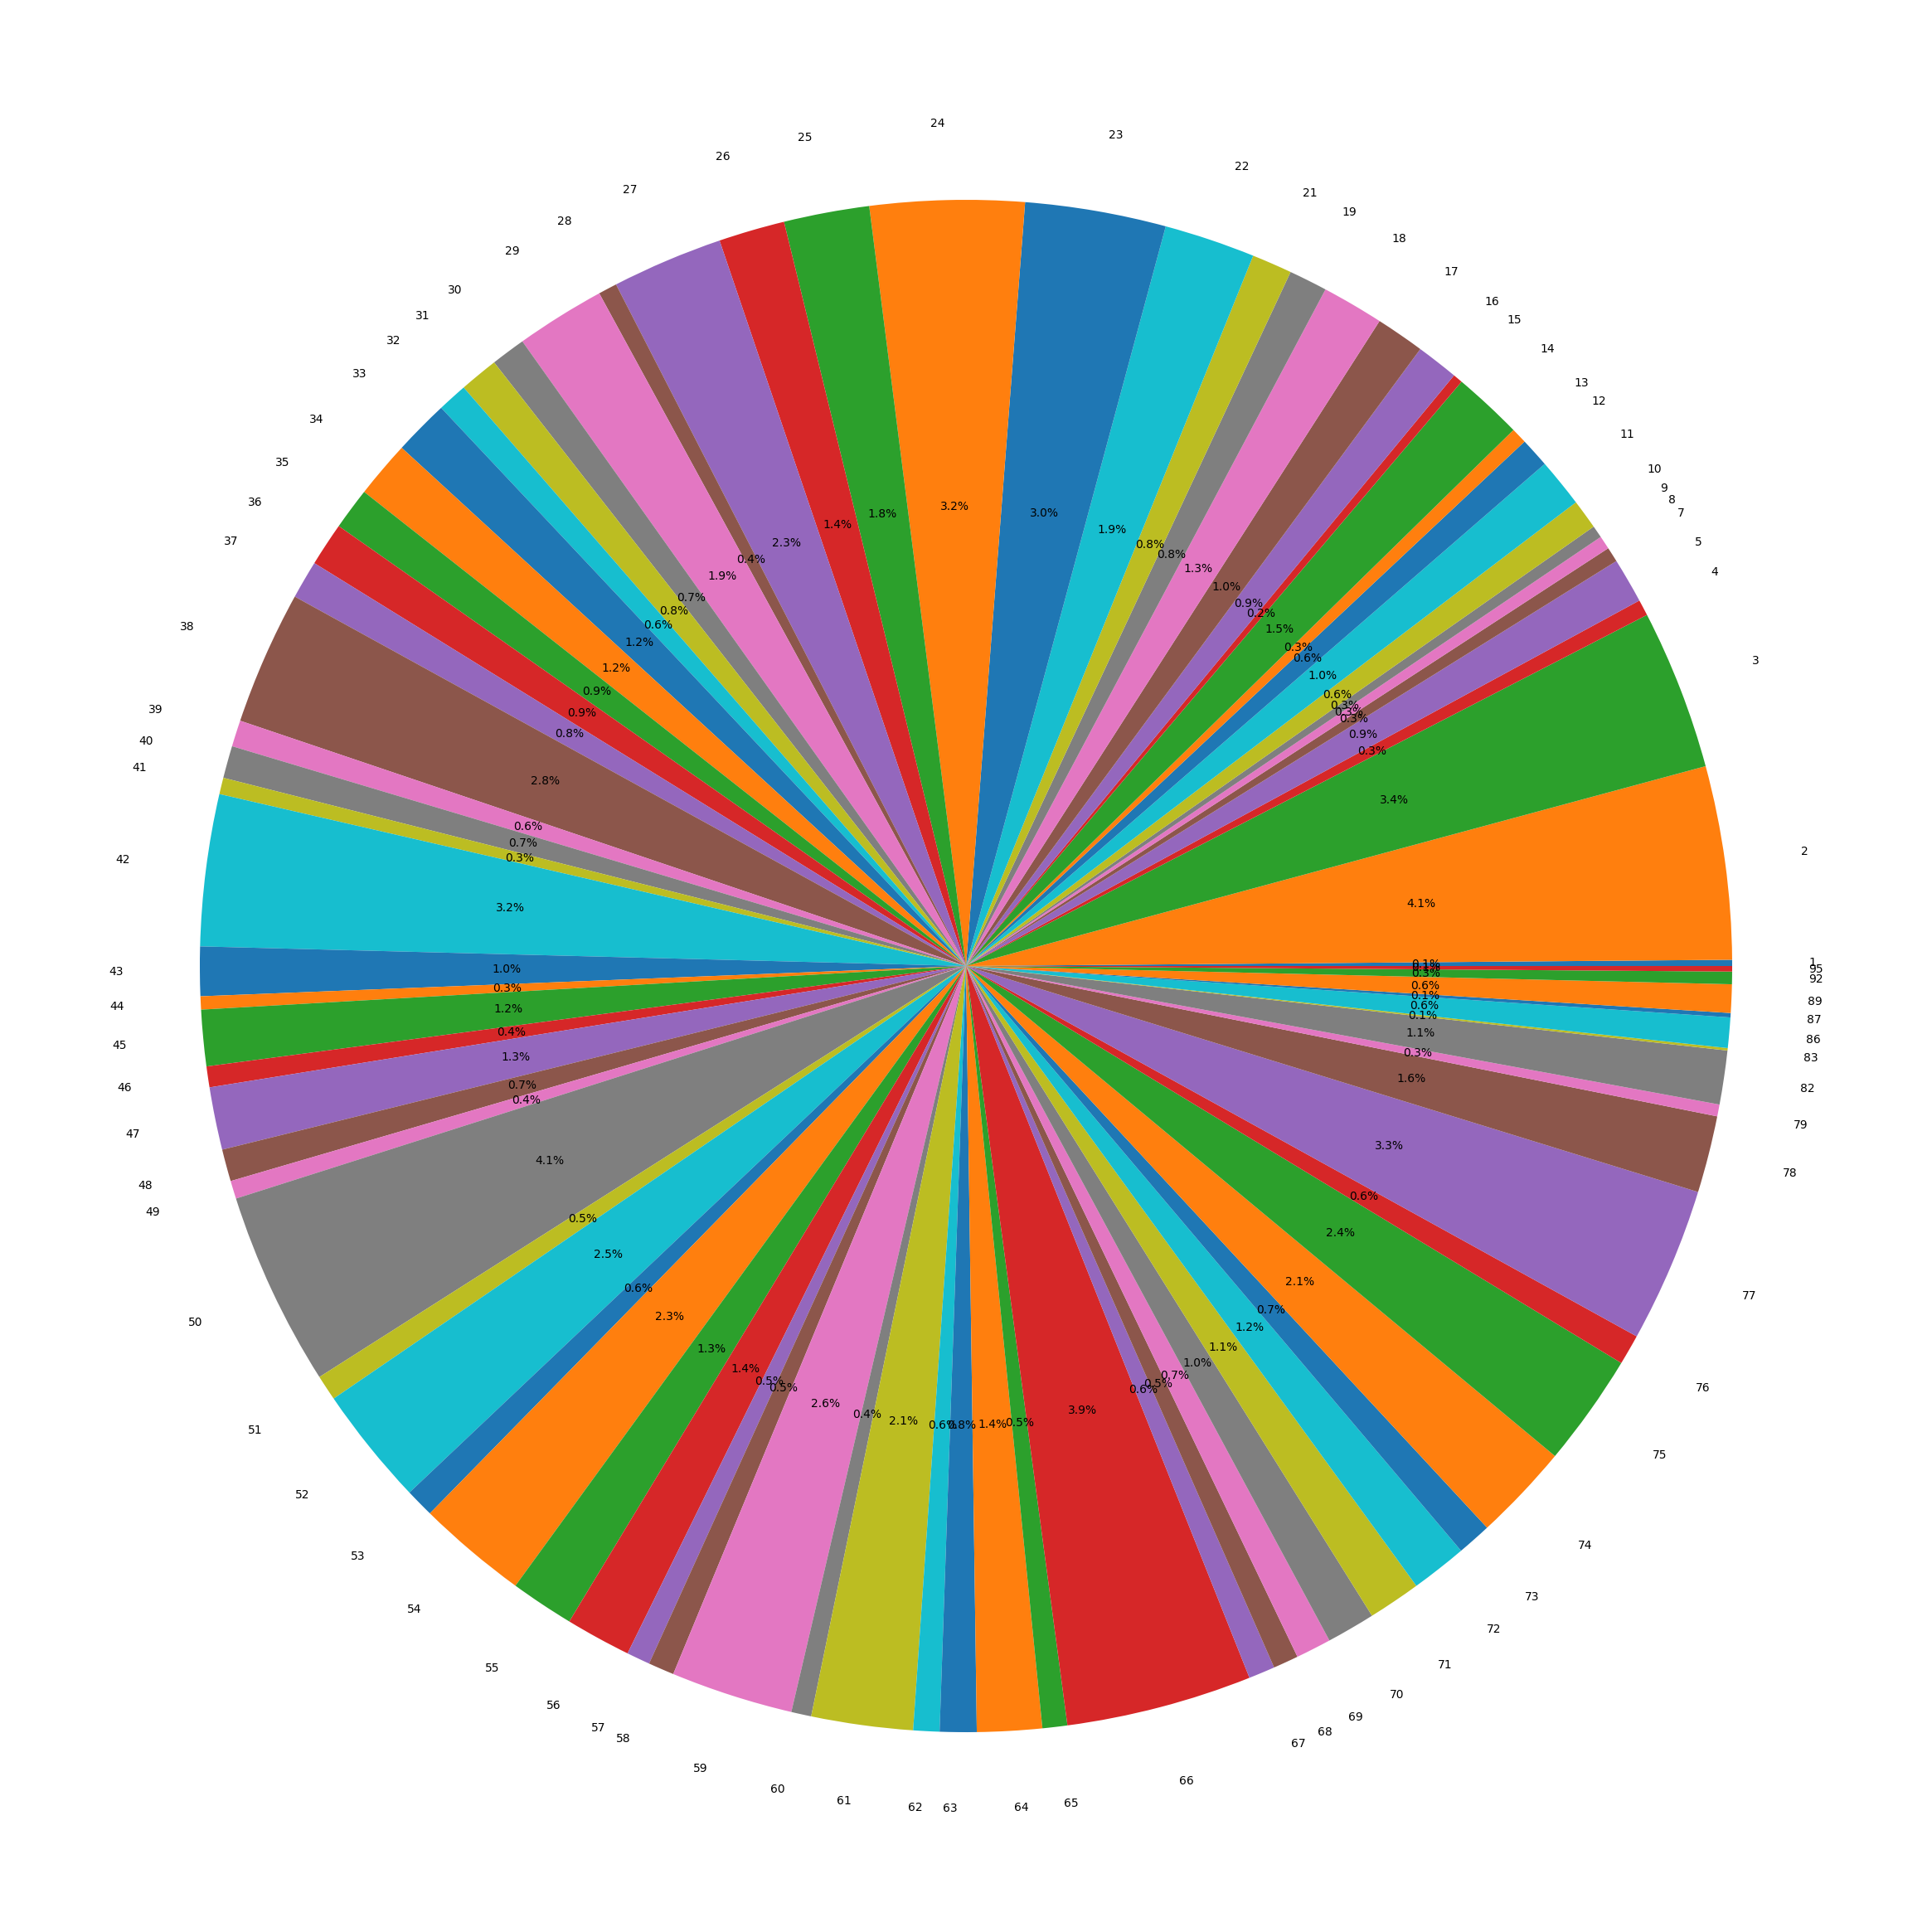

In [35]:
fig1, ax1 = plt.subplots(figsize = (30, 30))
ax1.pie(region_dist['id'], labels = region_dist['region'], autopct = '%1.1f%%')
plt.show()

<BarContainer object of 4 artists>

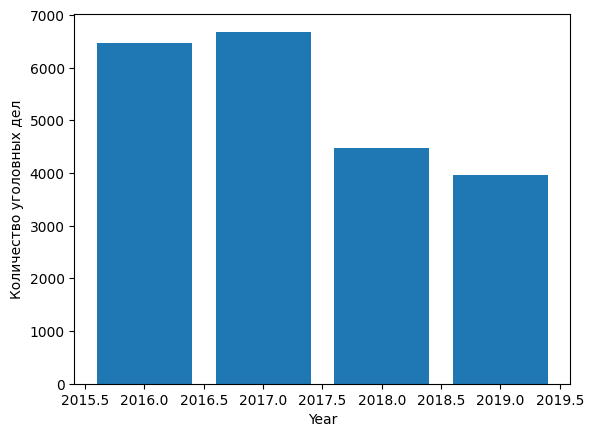

In [36]:
years = data1['year'].value_counts()
plt.xlabel('Year')
plt.ylabel('Количество уголовных дел')
plt.bar(x=years.index, height=years.values)

In [37]:
data2= data2.iloc[0:0]
data3= data3.iloc[0:0]
data4= data4.iloc[0:0]
data5= data5.iloc[0:0]
data6= data6.iloc[0:0]
data7= data7.iloc[0:0]
data8= data8.iloc[0:0]
data9= data9.iloc[0:0]
data10 = data10.iloc[0:0]
data11 = data11.iloc[0:0]
data12= data12.iloc[0:0]
data13= data13.iloc[0:0]

In [38]:
testik

,sex,id
0,masc,28
1,femn,30
2,femn,31
3,masc,36
4,femn,38
...,...,...
23395,masc,90640
23396,masc,90685
23397,masc,90686
23398,masc,90691


In [39]:
testik.to_pickle('data_new_2016_crimes.pickle')